## Downloading the datset from Kaggle.com

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
url='https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/download?datasetVersionNumber=12'

In [ ]:
od.download(url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


##QUESTIONS

1.How is the distribution of accidents across various cities and any other points that is important from cities'data

2.What time of the day are the accidents most frequent in?

3.Which days of the week do have the most accidents

4.Which months do have most of the accidents

5.What's the trend of accidents year over year(decreasing/increasing)

6.Is the distribution of accients by hour the same on weekends as weekdays?
7. What does the data say about the severity of accidents

## Data preparation and Data cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("/content/us-accidents/US_Accidents_Dec21_updated.csv")

In [ ]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
len(df.columns)

47

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
missing_proportion= df.isnull().sum().sort_values(ascending=False)/len(df)
missing_proportion

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

In [ ]:
missing_proportion[missing_proportion!=0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

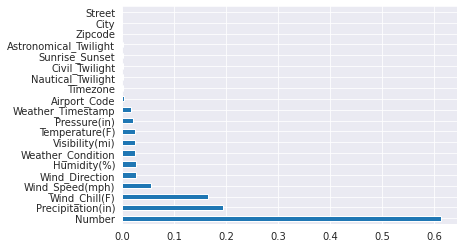

In [ ]:
missing_proportion[missing_proportion!=0].plot(kind='barh')

In [ ]:
df.rename(columns={'Start_Time':'Time'},inplace=True)

## Exploratory analysis and visualisation


### City Column

In [ ]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943318 entries, 42 to 2845307
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     943318 non-null  object 
 1   Severity               943318 non-null  int64  
 2   Time                   943318 non-null  object 
 3   End_Time               943318 non-null  object 
 4   Start_Lat              943318 non-null  float64
 5   Start_Lng              943318 non-null  float64
 6   End_Lat                943318 non-null  float64
 7   End_Lng                943318 non-null  float64
 8   Distance(mi)           943318 non-null  float64
 9   Description            943318 non-null  object 
 10  Number                 943318 non-null  float64
 11  Street                 943318 non-null  object 
 12  Side                   943318 non-null  object 
 13  City                   943318 non-null  object 
 14  County                 943318 non-

In [ ]:
df.City

42                   Dunkirk
43                    Redkey
47                 Willshire
50         Cambridge Springs
66                 Cleveland
                 ...        
2845298             Pacifica
2845302            Yuba City
2845303            Yuba City
2845304       San Bernardino
2845307               Goleta
Name: City, Length: 943318, dtype: object

In [ ]:
cities=df.City.unique()
len(cities)

8504

In [ ]:
cities_by_accidents=df.City.value_counts()
cities_by_accidents

Miami                           67276
Orlando                         37644
Los Angeles                     20194
Houston                         18923
Charlotte                       16044
                                ...  
Asbury                              1
Prestonsburg                        1
Marble                              1
Intervale                           1
American Fork-Pleasant Grove        1
Name: City, Length: 8504, dtype: int64

New York appear in the data if yes then why doesn't it, the most populous city of USA, come at top.

In [ ]:
'New York' in df.City

False

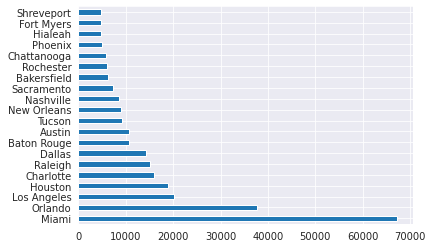

In [ ]:
cities_by_accidents[:20].plot(kind='barh')

In [174]:
import seaborn as sns
sns.set_style("white")

In [ ]:
higher_accident_cities=cities_by_accidents[cities_by_accidents>1000]
Lower_accident_cities= cities_by_accidents[cities_by_accidents<=1000]

In [ ]:
len(higher_accident_cities)/len(cities)

0.013640639698965193

In [ ]:
x=cities_by_accidents[cities_by_accidents<5]
x

Ellabell                        4
Kerrick                         4
Longboat Key                    4
Grapevine                       4
Elizabethport                   4
                               ..
Asbury                          1
Prestonsburg                    1
Marble                          1
Intervale                       1
American Fork-Pleasant Grove    1
Name: City, Length: 2545, dtype: int64

In [173]:
states_by_accidents=df.State.value_counts()
states_by_accidents

FL    217566
CA    215629
SC     57481
TX     52073
PA     48470
OR     45295
NC     42677
VA     30320
MN     26337
LA     25843
NY     23138
TN     21480
AZ     20138
MD     11635
MI     10952
UT     10843
IL      9853
MT      7895
NJ      7675
OH      6444
WA      6418
AL      5093
OK      5041
MO      4184
CO      3570
ID      3396
DC      3385
AR      2889
GA      2858
CT      2571
IN      2229
DE      1474
IA      1318
WV      1134
KY      1078
MS       823
NV       788
NE       568
MA       546
WI       496
ND       448
KS       359
NH       218
ME       167
NM       162
SD       122
VT       102
RI        92
WY        45
Name: State, dtype: int64

##States

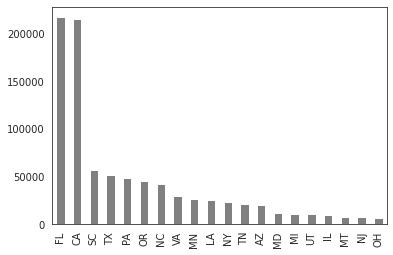

In [177]:
states_by_accidents[:20].plot(kind='bar',color='grey')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


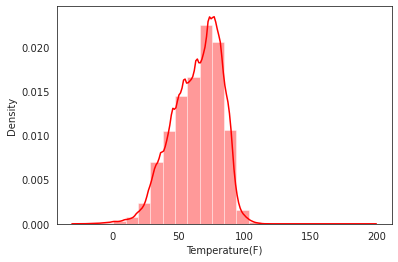

In [186]:
sns.distplot(df['Temperature(F)'],bins=24,color='red')

In [201]:
zipcodes=df.Zipcode.value_counts()
zipcodes

33186         3555
33183         2138
33173         1499
32837         1462
32819         1370
              ... 
29706-7147       1
29203-1110       1
59019-9601       1
23219-2209       1
95993-9513       1
Name: Zipcode, Length: 309403, dtype: int64

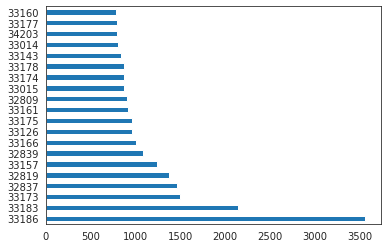

In [202]:
zipcodes[:20].plot(kind='barh')

In [ ]:
These are highly accident prone zipcodes

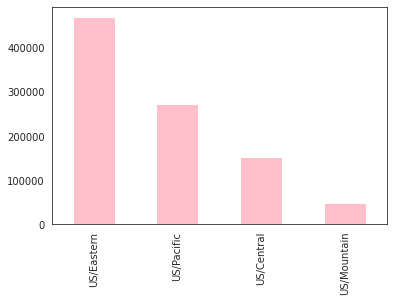

In [235]:
zone=df.Timezone.value_counts()
zone.plot(kind='bar',color='pink')

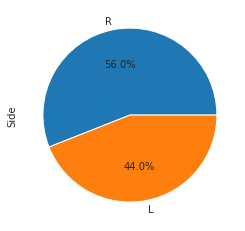

In [237]:
side=df.Side.value_counts()
side.plot(kind='pie',autopct='%2.1f%%')

In [204]:
vis=df['Visibility(mi)'].value_counts()
vis

10.00     781529
7.00       22946
9.00       21981
8.00       17777
5.00       16218
6.00       15089
4.00       13592
2.00       13401
3.00       12635
1.00       11751
0.25        4644
0.50        3759
0.75        2698
0.00        1549
15.00        813
13.00        546
20.00        396
0.12         265
40.00        226
2.50         224
0.20         209
0.80         187
1.50         140
25.00        135
1.80         133
1.20         128
80.00        101
0.38          39
0.06          31
50.00         30
100.00        28
30.00         27
0.63          25
0.88          15
0.10          15
90.00          6
75.00          5
60.00          5
45.00          5
0.60           4
70.00          3
0.19           2
35.00          2
1.10           1
16.00          1
2.80           1
43.00          1
Name: Visibility(mi), dtype: int64

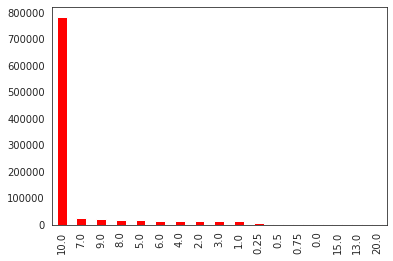

In [205]:
vis[:20].plot(kind='bar',color='red')

As we can see that most of the accients happened in a high visibility. It means the visibility is not an important factor


In [212]:
Weather=df.Weather_Condition.value_counts()
Weather

Fair                            466076
Cloudy                          139944
Mostly Cloudy                   123642
Partly Cloudy                    85090
Light Rain                       39389
                                 ...  
Heavy Rain Shower / Windy            1
Heavy Sleet                          1
Thunder and Hail                     1
Light Rain Shower / Windy            1
Light Thunderstorms and Rain         1
Name: Weather_Condition, Length: 91, dtype: int64

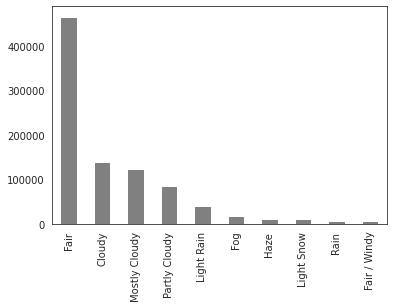

In [213]:
Weather[:10].plot(kind='bar',color='grey')

Most of the accidents happened in fair weather but after that cloudy weather accidents are significant


In [216]:
amenity=df.Amenity.value_counts()
amenity


False    923353
True      19965
Name: Amenity, dtype: int64

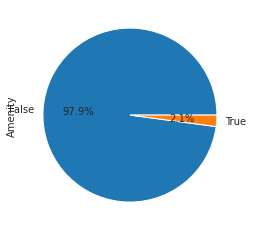

In [226]:
amenity.plot(kind='pie',autopct='%2.1f%%')

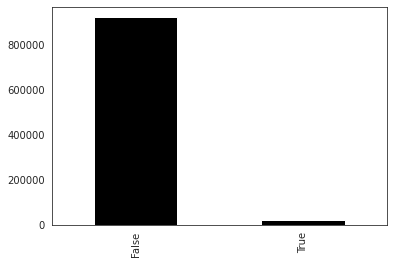

In [219]:
amenity.plot(kind='bar',color='black')

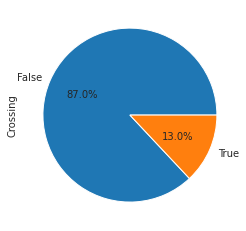

In [230]:
cross=df.Crossing.value_counts()
cross.plot(kind='pie',autopct='%2.1f%%')


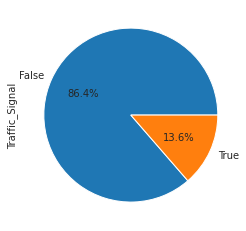

In [231]:
signal=df.Traffic_Signal.value_counts()
signal.plot(kind='pie',autopct='%2.1f%%')

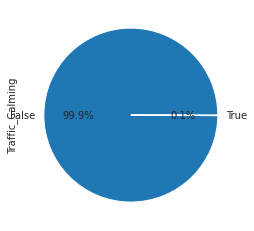

In [234]:
calming=df.Traffic_Calming.value_counts()
calming.plot(kind='pie',autopct='%2.1f%%')

42         False
43         False
47         False
50         False
66         False
           ...  
2845298    False
2845302    False
2845303    False
2845304    False
2845307    False
Name: Crossing, Length: 943318, dtype: bool

### Time column

In [ ]:
df.Time

42         2016-02-09 18:20:58
43         2016-02-09 18:20:58
47         2016-02-10 06:18:49
50         2016-02-10 08:35:27
66         2016-02-10 12:54:39
                  ...         
2845298    2019-08-23 16:19:21
2845302    2019-08-23 17:25:12
2845303    2019-08-23 17:25:12
2845304    2019-08-23 01:16:01
2845307    2019-08-23 10:32:30
Name: Time, Length: 943318, dtype: object

In [ ]:
df.Time=pd.to_datetime(df.Time)

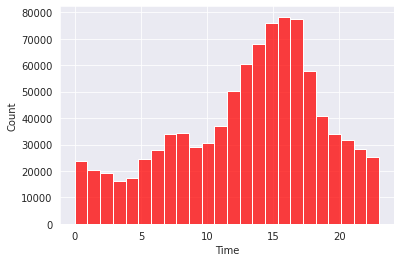

In [ ]:
sns.histplot(df.Time.dt.hour,bins=24,color='red')

A high percentage of accidents occur between 7AM to 9AM and between 3PM to 6PM

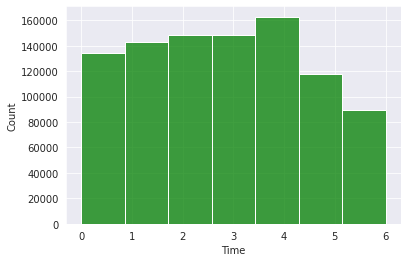

In [ ]:
sns.histplot(df.Time.dt.dayofweek,bins=7,color='green')

We can see that number of accidents on weekends are nearly half of that of working days. It is because of less traffic during these days

Is the distribution of accients by hour the same on weekends as weekdays?

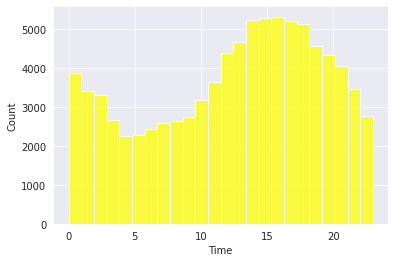

In [ ]:
sundays_start_time= df.Time[df.Time.dt.dayofweek==6]
sns.histplot(sundays_start_time.dt.hour,bins=24,color='yellow')

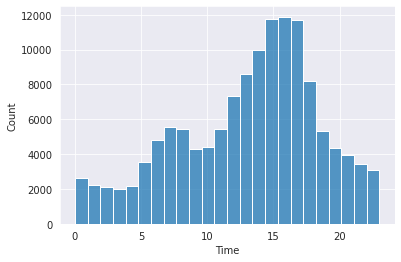

In [ ]:
mondays_start_time= df.Time[df.Time.dt.dayofweek==0]
sns.histplot(mondays_start_time.dt.hour,bins=24)

If we see the hourly graphs for sunday(weekend) and Monday(weekday) we see following things-
1. On Sundays accidents are well distributed  while on Monday most of the accidents are confined in btween 7AM To 9AM and 3PM TO 6PM
2.On Mondays we can see that accidents between 8PM and 12AM are very less compared to other hours but on Sundays they are almost equal to other hours. 

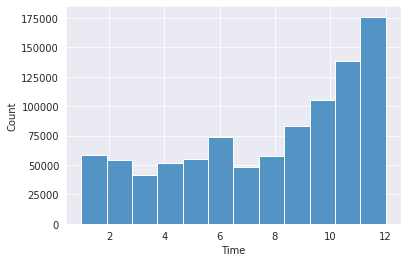

In [ ]:
sns.histplot(df.Time.dt.month,bins=12)

We can see that last months are having more accidents. It is also supported by reports from the National Highway Traffic Safety Administration December sees the most car accidents. There are many reasons for this-
a) Adverse weather conditions in winter also lead to more collisions
b) Group Travel at the end of the year with different vehicles
c) These are holiday months 
d) People drive more in nights, during winter months


But let's check yearwise data to see whether the above graph is giving right picture or not?

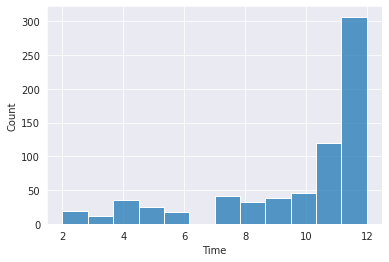

In [ ]:
df_year=df.Time.dt.month[df.Time.dt.year==2016]
sns.histplot(df_year,bins=12)

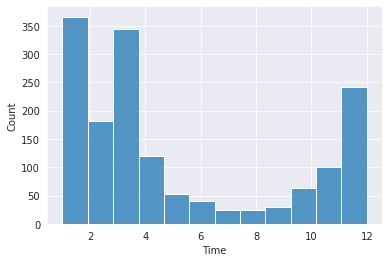

In [ ]:
df_year=df.Time.dt.month[df.Time.dt.year==2017]
sns.histplot(df_year,bins=12)

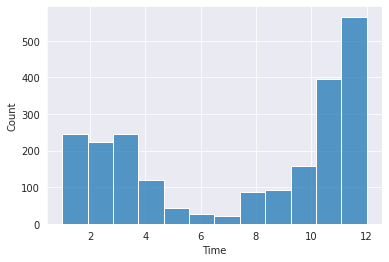

In [ ]:
df_year=df.Time.dt.month[df.Time.dt.year==2018]
sns.histplot(df_year,bins=12)

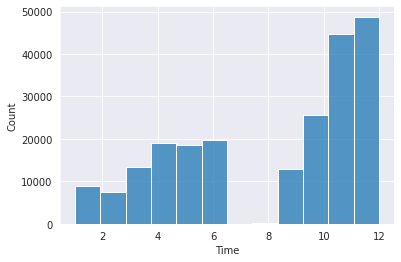

In [ ]:
df_year=df.Time.dt.month[df.Time.dt.year==2020]
sns.histplot(df_year,bins=12)

After seeing these yearwise graphs we can say that the aggregate monthly graph is giving the right picture qualitatively but may not be giving the right picture quantitatively because missing datas of few months in 2020,2016. Also we can see that 2017 graph has equal distribution

In [ ]:
df_year=df.Time.dt.year
Accidents_yearly=df_year.value_counts()
Accidents_yearly.sort_values(ascending=True)


2016       693
2017      1590
2018      2225
2019     49694
2020    219585
2021    669531
Name: Time, dtype: int64

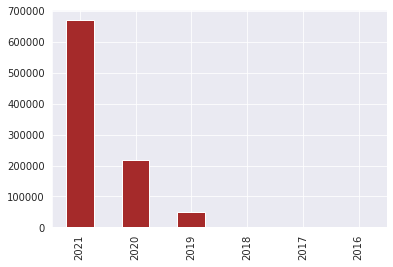

In [ ]:
Accidents_yearly.plot(kind='bar',color='brown')

From the above graph we can see that accidents in US are rising year by year

### Start_Lat and Start_Lng

In [ ]:
df.Start_Lat

42         40.451120
43         40.354290
47         40.728130
50         41.831930
66         41.483390
             ...    
2845298    37.609816
2845302    38.995930
2845303    39.003170
2845304    34.121320
2845307    34.485189
Name: Start_Lat, Length: 943318, dtype: float64

In [ ]:
df.Start_Lng

42         -85.150480
43         -85.149930
47         -84.789650
50         -80.101430
66         -81.662970
              ...    
2845298   -122.493720
2845302   -121.672020
2845303   -121.662679
2845304   -117.254540
2845307   -120.229276
Name: Start_Lng, Length: 943318, dtype: float64

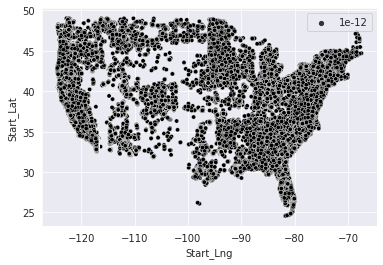

In [ ]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat,size=.000000000001,color='black')

In [ ]:
import folium as fm

In [ ]:
lat = df.Start_Lat[0]
lon = df.Start_Lng[0]
lat,lon

KeyError: ignored

In [ ]:
map=fm.Map()
marker=fm.Marker((lat, lon))
marker.add_to(map)
map

In [ ]:
x=list(zip(list(df.Start_Lat), list(df.Start_Lng)))
x

[(40.45112, -85.15048),
 (40.35429, -85.14993),
 (40.72813, -84.78965),
 (41.83193, -80.10143000000002),
 (41.48339, -81.66297),
 (38.33667, -81.65623000000002),
 (38.33614, -81.65623000000002),
 (40.58919, -80.09885),
 (40.58919, -80.09885),
 (40.484222, -80.13755400000002),
 (38.824929, -85.47449499999998),
 (41.06347, -81.50372),
 (41.47395, -81.69931),
 (41.427584, -85.8495),
 (41.471378, -85.839527),
 (39.97527, -85.14018),
 (39.98511, -85.14406),
 (39.9672, -81.28699999999998),
 (39.96392, -81.27197),
 (39.43794000000001, -82.53893000000002),
 (41.13613, -81.72196),
 (40.27675, -85.49916),
 (40.53491, -83.10678),
 (40.52035, -83.10043),
 (39.693164, -83.882745),
 (38.84685, -120.02881),
 (38.82653, -120.03011),
 (35.52718, -121.04482),
 (35.69116, -121.2895),
 (35.72088, -118.49953),
 (35.72093, -118.49992),
 (34.583175, -118.343213),
 (34.583166, -118.343323),
 (33.880115999999994, -116.991175),
 (33.933499, -117.000073),
 (34.43678, -118.372328),
 (34.432644, -118.383992),
 (33

In [ ]:
from folium import plugins
from folium.plugins import HeatMap

In [ ]:
sample_df= df.sample(int(.1*len(df)))
x=list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))
x

[(25.605246, -80.351185),
 (37.653633, -120.774174),
 (34.049769, -80.216856),
 (32.810109999999995, -96.803444),
 (37.212512, -93.376724),
 (45.416911, -121.140028),
 (32.63625, -82.37188),
 (35.121879, -85.248575),
 (40.640537, -122.23255),
 (30.00012000000001, -95.16293),
 (33.996158, -117.985949),
 (33.927774, -118.250471),
 (34.367597, -117.541188),
 (39.84523, -75.715164),
 (34.582579, -79.761266),
 (38.678993, -121.334915),
 (34.697697999999995, -81.210454),
 (28.479218, -81.3307),
 (34.644024, -79.586541),
 (43.298074, -122.894518),
 (30.474504, -87.22540699999998),
 (38.238832, -122.673857),
 (34.567832, -119.946938),
 (28.361505, -82.559253),
 (41.82728, -87.95345),
 (38.011287, -121.321215),
 (34.998228000000005, -82.06031800000002),
 (30.22748, -97.761496),
 (35.845432, -78.680284),
 (34.173149, -119.142496),
 (25.749454, -80.335813),
 (32.337307, -110.97866100000002),
 (40.779452, -77.758707),
 (27.269325, -82.502678),
 (25.930062, -80.293485),
 (28.454159000000004, -81.39

In [ ]:
map=fm.Map()
HeatMap(x).add_to(map)
map

In [ ]:
df.columns

Index(['ID', 'Severity', 'Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Severity

In [ ]:
df.Severity

42         4
43         4
47         4
50         2
66         2
          ..
2845298    3
2845302    4
2845303    4
2845304    3
2845307    3
Name: Severity, Length: 943318, dtype: int64

Accidents according to their severity

In [ ]:
df.Severity.isnull().sum()

0

In [ ]:
accidents_severity=df.Severity.value_counts()
accidents_severity

2    889904
4     29073
3     13716
1     10625
Name: Severity, dtype: int64

So we can say that most of the accidents are of medium severity

In [156]:
df.columns

Index(['ID', 'Severity', 'Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# INSIGHTS

1.Slightly more than 4% of total cities are having more than 1000 accidents 

2.The number of accidents per city decreases or increases exponentially

3.3029 cities have reported less that 5 accidents(This needs to be investigated)

4.New York does not appear in the data, although it is one of the most populous and important cities of US.

5.A high percentage of accidents occur between 7AM to 9AM and between 3PM to 6PM.

6. It is also found that weekdays have far more accidents than weekends.

7.If we see the hourly graphs for sunday(weekend) and Monday(weekday) we see following things-

a)The distribution of accients by hour is not same on weekends as weekdays?
b) On Sundays accidents are well distributed  while on Monday most of the accidents are confined in btween 7AM To 9AM and 3PM TO 6PM
c) On Mondays we can see that accidents between 8PM and 12AM are very less compared to other hours but on Sundays they are almost equal to other hours.

8.We can see that last months of a year are having more accidents. It is also supported by reports from the National Highway Traffic Safety Administration December sees the most car accidents. There are many reasons for this-
a) Adverse weather conditions in winter also lead to more collisions
b) Group Travel at the end of the year with different vehicles
c) These are holiday months 
d) People drive more in nights, during winter months

9.From the graph we can see that accidents in US are rising year by year

10.It is found that most of the accidents are of medium severity